<a href="https://colab.research.google.com/github/sammatiphugate/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Sammati_Phugate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Approach:**


* We are provided with two datasets, one contains all the details of the app, and another one contains the user reviews of the respective app. By analysing these two datasets, we must come up with the key factors that are responsible for app engagement and success.
* First we need to explore the type of data present in the dataset and define the contents and the datatype in each column.
* Once we define the the contents in each column, we can identify and handle all the NaN and error values present in the dataset. We can also inspect the datatypes of the values in each column and convert it to an appropriate datatype.
* Now we can analyse the data pipeline and come up with different visualizations.
* From the visualizations we can come up with insights and the factors responsible for the success of an app.

# **Exploring the data**

In [2]:
#Importing libraries to read the csv files 
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the csv file
play_app_path = '/content/drive/MyDrive/almabetter/EDA project/Copy of Play Store Data.csv'

pl_data = pd.read_csv(play_app_path)

In [5]:
# Exploring the basics of data
pl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**we can see there are 13 columns , 10841 rows in this csv file soo, let exlpore inside  data**

In [6]:
# lets see the first 5 columns of dataset
pl_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
# lets see the last 5 columns of dataset
pl_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [19]:
#Columns of data set
pl_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **Each columns information**

* **`App`**: Contains the name of the app and short description .
* **`Category`**: It gives the category to the app.
* **`Rating`**: It contains the average rating the of particular app ,  received from its users.
* **`Reviews`**: It contains the number of users that have dropped a review in comment for the particular app.
* **`Size`**: It contains the space takes by particular app for user device
* **`Installs`**:  It shows round figure, particular app has been downloaded.
* **`Type`**: It states whether an app is free for user  or paid.
* **`Price`**: It shows  the price takes  to install the app, (if it is paid)
* **`Content rating`**: It shows paticular app is suitable for either for teenager, adults or for everyone
* **`Genres`**: It shows  the genre(s) to which the particular app belongs .
* **`Last updated`**: It shows date of app , latest update was released.
* **`Current Ver`**8: It shows  the current version of the particular app.
* **`Android Ver`**: It shows  the android version of the particular app.

In [20]:
#lets see statistical view of numeric data 

pl_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


 
## **In this step we are going to remove the missing values ,duplicate values, making data clean that we can explore data easily for analysis**


In [21]:
#lets handle null values of dataset
pl_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**As we can see :null values**

*      Rating having :1474 

*   Type having: 1 

*  content Rating: 1 
*   current ver: 8 

*   Android ver : 3







**let remove null values from columns  one by one**

In [22]:
#let remove row contain null values from rating column
pl_data[pl_data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff50063dc10>]],
      dtype=object)

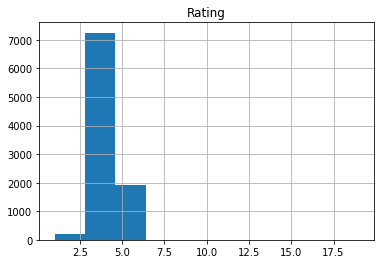

In [23]:
pl_data.hist()

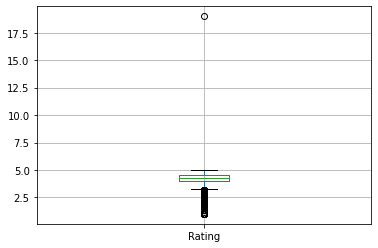

In [24]:
pl_data.boxplot()

# As we know that the rating of any app in the play store can be under 1 to 5.
As shown in graphs that , rating is crossing the 5  which is not true value lets remove the null vales

In [25]:
pl_data[pl_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [26]:
pl_data.drop([10472],inplace= True)

In [27]:
pl_data[10471:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [ ]:
pl_data.shape

(10840, 13)

as we can see 10472 row has been removed

**As we can see rating column contain 1474 null values , we cannot drop such large amonunt of row we will loose large amount of data that directly impact on quality of data analysis**

In [28]:
#Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(pl_data[~pl_data['Rating'].isnull()]['Rating'].mean(),1)

median_rating = pl_data[~pl_data['Rating'].isnull()]['Rating'].median()

[mean_rating, median_rating]

[4.2, 4.3]

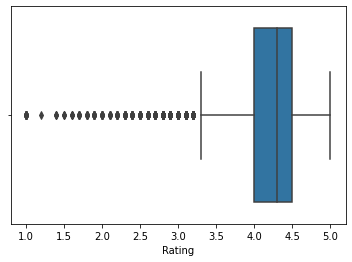

In [29]:
# Boxplot

sea.boxplot(data = pl_data['Rating'],x = pl_data['Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


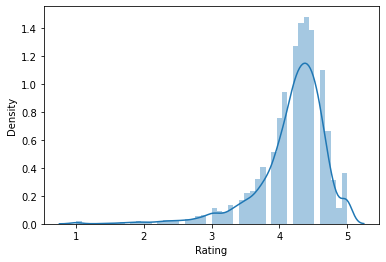

In [30]:
# Distplot

sea.distplot(pl_data['Rating'])

**The mean of the average ratings comes to be 4.2. excluding null values**

**The median of the entries in the 'Rating' column comes to be 4.3
AS we can see that 50% of apps have an average of 4.2 and 4.3**

 **AS we have shown in visualization
 medain is better representation of majority of the values in variables**
 


In [31]:
# Replacing the NaN values in the 'Rating' colunm with its median value

pl_data['Rating'].fillna(value=median_rating, inplace=True)

In [ ]:
#lets check in data rating null data has been removed
pl_data.isnull().sum() 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

# 2. **Type column contain only one null value**

In [32]:
# identify which is null value in type column
pl_data[pl_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


**AS we can see there is only Type column contain null value which should be either"free" or "paid" also, if app is paid value contain in price should be contain some value instead of "zero" 
value is showing zero means its bydefault it should be consider as  "free"**

In [33]:
# replace null value in TYpe section 
pl_data.loc[9148,'Type'] = 'Free'

In [34]:
pl_data.isnull().sum() 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

## 3. **Current Ver contain 8 null values**

In [35]:
# check for null values 
pl_data[pl_data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


as we see there is eight null values in rows column of" Current ver" 


In [36]:
# lets drop the rowns which contain null values
pl_data = pl_data[pl_data['Current Ver'].notna()]

In [37]:
# recheck 
pl_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

**3. "Android Ver" contain 2 null values**

In [38]:
#check for null values in Andriod Ver column
pl_data[pl_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


 **As we can  see there are 2 null values we cannot replace with any values so droping the rows **

In [39]:
#Let drop the rows which contain null values
pl_data = pl_data[pl_data['Android Ver'].notna()]

In [40]:
# recheck null values is removed
pl_data[pl_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [41]:
pl_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Shape of the updated dataframe

pl_data.shape

(10830, 13)

# **Lets work on Data Manipulation and handle Error values of column**

In [ ]:
# let check the columns 
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Lets remove Duplicate values** **bold text**


# **Handling the duplicates in the App column**



In [42]:
pl_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [43]:
# checking  Duplicate values
pl_data[pl_data['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [44]:
pl_data[pl_data['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up




 Lets Drop duplicate values in App column  for accurate data

In [45]:
# drop  duplicate column
pl_data.drop_duplicates(subset = 'App', inplace = True)

In [46]:
pl_data['App'].value_counts()


Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

In [47]:

# Recheck for duplicate value 

pl_data[pl_data['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [ ]:
pl_data[pl_data['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Let check for  number rows and column after duplicate value removing
pl_data.shape

(9649, 13)

**As we can see size of appllication are some are in MB and some are in KB , lets convert all into in MB It will be easy for anlaysis**

In [49]:
# lets convert into float datatype 

def kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [50]:
# The kb_to_mb funtion applied to the size column

pl_data['Size'] = pl_data['Size'].apply(lambda x: kb_to_mb(x))


In [51]:
#lets check in dataset 
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
pl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
pl_data.head()

AS we can see all the size coverted in float type 

 **lets convert "Installs" ,"price " and " Reviews" column into float and integer , so its will be improve analysis**

In [53]:

pl_data['Price'] = pl_data['Price'].apply((lambda x:str(x).replace('$','')
if'$'in str(x)
 else str(x)))

pl_data['Price'] = pl_data['Price'].apply(lambda x :float (x))


In [54]:
# lets check price column has been change or not 
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


as we can see "price section as been converted to float from 'str'

# lets change Review column 

In [55]:
pl_data['Reviews'] = pl_data['Reviews'].astype(int)


In [56]:
# lets check "Reviews column in table"
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [57]:
pl_data.describe()

,Rating,Reviews,Price
count,9649.000000,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,1.100079
std,0.496528,1.832255e+06,16.860857
min,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,0.000000
50%,4.300000,9.690000e+02,0.000000
75%,4.500000,2.944500e+04,0.000000
max,5.000000,7.815831e+07,400.000000


As we can see "Review ", "Rating", "Price" column has been converted into integer , so convert "Install" column 

In [58]:
#lets convert install column into interger
pl_data['Installs'] = pl_data['Installs'].apply((lambda x:str(x).replace('+','')
if'+'in str(x)
 else str(x)))

pl_data['Installs'] = pl_data['Installs'].apply((lambda x:str(x).replace(',','')
if','in str(x)
 else str(x)))


pl_data['Installs'] = pl_data['Installs'].apply(lambda x :float (x))


In [59]:
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [60]:
pl_data.describe()

,Rating,Reviews,Installs,Price
count,9649.000000,9.649000e+03,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,7.785404e+06,1.100079
std,0.496528,1.832255e+06,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
pl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   float64
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


As we can see we have successfully converted all four column into float and integer from 'str'

In [ ]:
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Top Rated
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Below Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Top Rated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Top Rated
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Top Rated


In [61]:
pl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   float64
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB




#**Let change the "Last Updated" column from 'str' to datatime datatype**

In [62]:
# count values of Last Update column

pl_data['Last Updated'].value_counts()

August 3, 2018     252
August 2, 2018     230
August 1, 2018     209
July 31, 2018      204
July 30, 2018      160
                  ... 
June 14, 2016        1
October 2, 2015      1
May 25, 2016         1
June 14, 2015        1
March 23, 2014       1
Name: Last Updated, Length: 1376, dtype: int64

In [63]:
#import datetime library

 
from datetime import datetime
pl_data['Last Updated'] = pl_data['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [64]:
pl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   float64       
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.0+ MB


# **Lets Exploring User Review dataset**



In [7]:
# lets connect and read csv file 
ur_review_path= '/content/drive/MyDrive/almabetter/EDA project/Copy of User Reviews.csv'

rev_ur = pd.read_csv(ur_review_path)

In [66]:
#Lets check the columns of dataset 
rev_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
rev_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [67]:
rev_ur.shape

(64295, 5)

**AS we can see this dataset is not huge only 5 columnc present in dataset
of 64295 rows of data** 

**Each column information**  

* **`App`**: Name of the Application with description  
* **`Translated_Review**`:  English translation of review of User about App 
* **`Sentiment`**: It can be ‘Positive’, ‘Negative’, or ‘Neutral’. It gives emotion of user or writer .It can be 'Positive', or 'Neutral' 

* **`Sentiment_Polarity`**:’.Its gives polarity of review rang of    (-1 or1) where 1 for 'positive statment
* **`Sentiment_Subjectivity`**:
 It shows the value what is the  impact  the reviewers opinion , Higher the subjectivity shows closer opinion and lower subjectivity shows review is more factual 




 
## **In this step we are going to remove the missing values ,duplicate values, making data clean that we can explore data easily for analysis**


In [68]:
# lets check the null values present in dataset
rev_ur.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

AS we can see except  'App' all columns having null values .

In [69]:
#lets check null values in "translated_Review" 
rev_ur[rev_ur['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


There are total 26868 rows haviing null values , its might be showing error because empty reviews ,so we cannot do anthing this data , lets drop this rows 

In [70]:
rev_ur = rev_ur.dropna()

In [ ]:
rev_ur[rev_ur['Translated_Review'].isnull()]


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


null values has been removed from "translated_Review" column 

Lets check for null values in 'sentiment ' column 

In [71]:
rev_ur[rev_ur['Sentiment'].isnull()]


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


there is no error in 'sentiment' column

In [72]:
#lets check in "sentiment_Polarity"
rev_ur[rev_ur['Sentiment_Polarity'].isnull()]


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [73]:
#lets check in "sentiment_subjectivity"
rev_ur[rev_ur['Sentiment_Subjectivity'].isnull()]


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


As we can see there is not Error or Null values present in any columns , as we have completed data cleaning and manipulation of dataset ; now lets work on Data Visualization 


# **Data Visualization**


# **Ratio of "paid and "Free version of play store in given dataset**

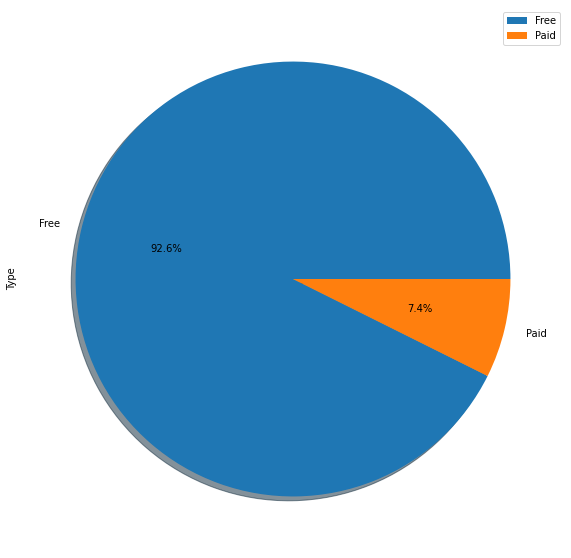

In [ ]:
pl_data['Type'].value_counts().plot.pie(figsize = (10,10),shadow= True, autopct='%1.1f%%')
plt.legend()

AS per "piechart" most of app present on playstore are "Free"

# **Content Rating** 

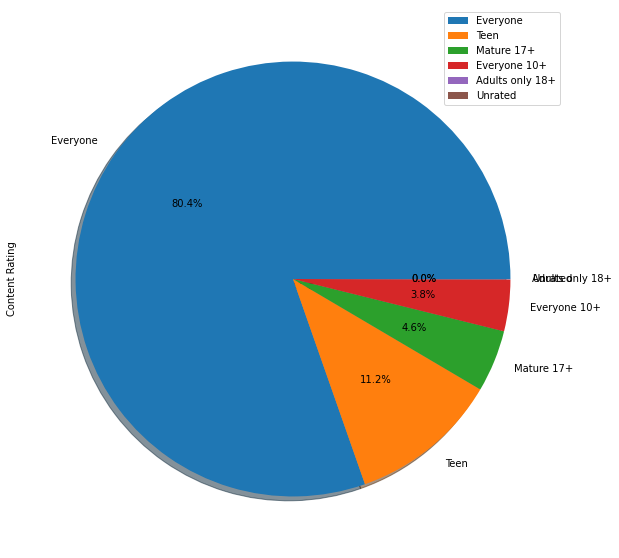

In [ ]:
pl_data['Content Rating'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%',shadow= True)
plt.legend()

AS per pie chart Visualization 80.4% Apps are accessible for all age groups,  others catorgries as per age groups 

# **App Rating**

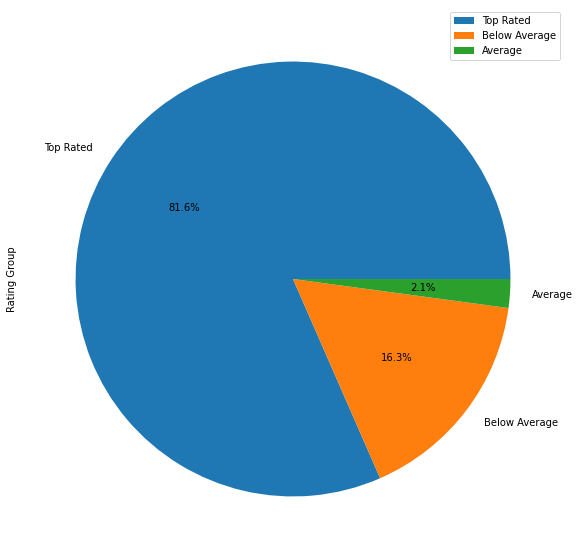

In [ ]:
pl_data['Rating Group'].value_counts().plot.pie(figsize = (15,10), autopct='%1.1f%%')
plt.legend()

68% of Apps are Top rated where average are just2.1% and below averge 
are 29.9% which means majority are top rate

# **Top Apps present each Category**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


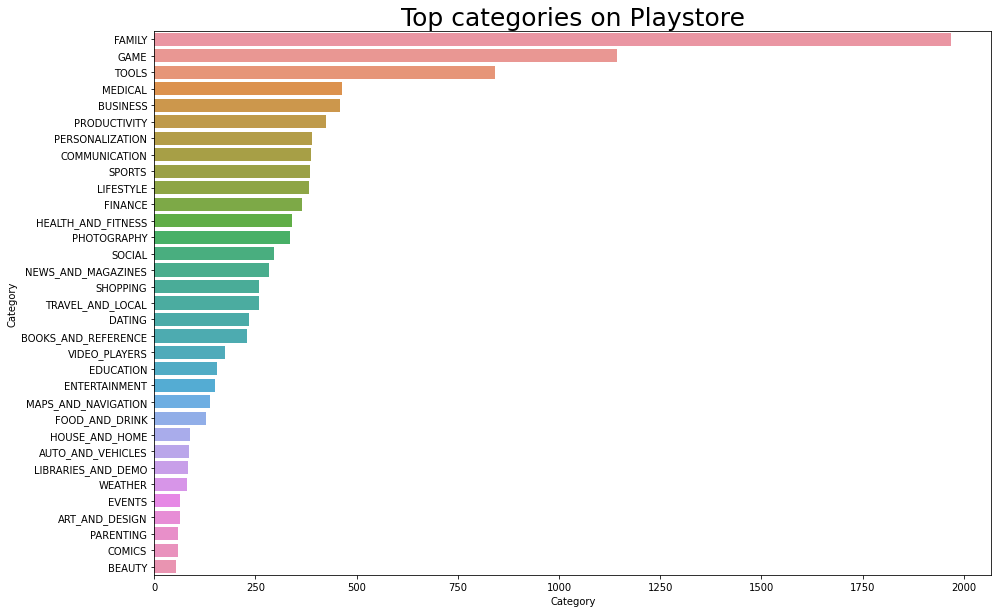

In [ ]:
plt.figure(figsize=(15,10))

y = pl_data['Category'].value_counts().index
x = pl_data['Category'].value_counts()
plt.xlabel("Count")
plt.ylabel("Category")
graph = sea.barplot(x, y)
graph.set_title("Top categories on Playstore", fontsize = 25);


THis graph shows top Appp installs areThe ** Family** , **Games** and `**Tools** categories has the highest number of installs compared to other categories of apps.

# **Average Rating Apps on playstore**

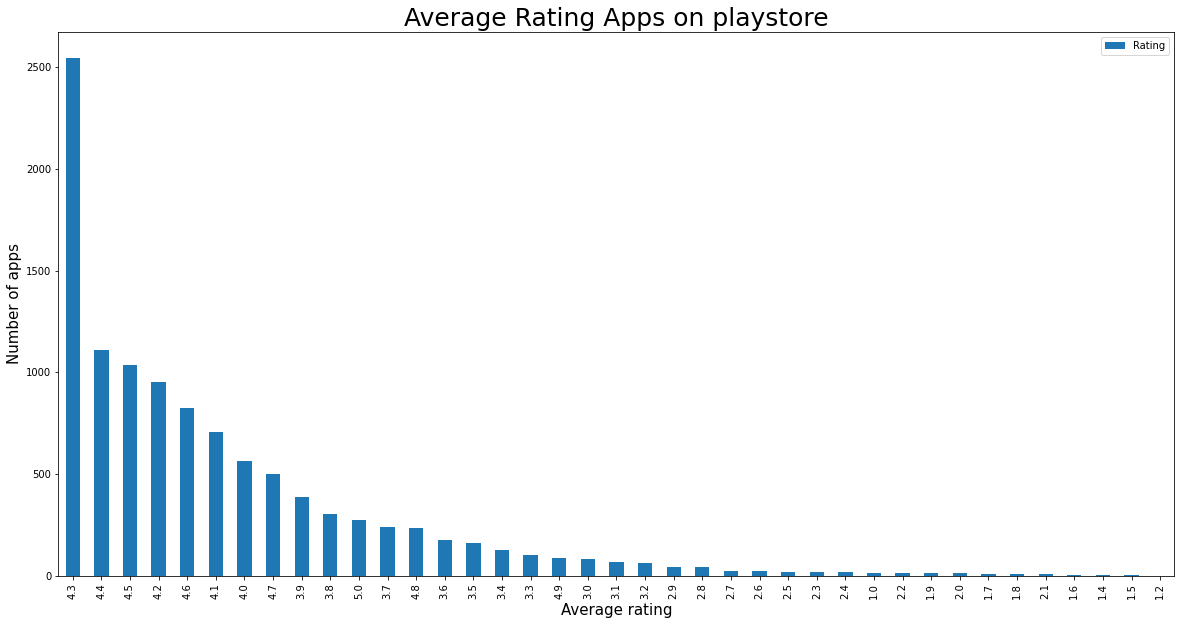

In [ ]:
pl_data['Rating'].value_counts().plot.bar(figsize=(20,10))
plt.xlabel('Average rating', size= 15)
plt.ylabel('Number of apps', size= 15)
plt.title('Average Rating Apps on playstore',size = 25, );

plt.legend()


As per the graph shows Average rating are:
* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average



Lets make new column "Rating Group in main frame 



In [74]:
# Lets Defining a function grouped_rating to group the rating 

def grouped_rating(num):
  '''
   This function helps to rate betwwen 1 and 5as top rated, average and below average
  '''
  if num>=4:
    return 'Top Rated'
  elif num>=2 and num<3:
    return 'Average'
  else:
    return 'Below Average'

Lets make new column " Grouped rating  " by applying function :

In [75]:
# Applying grouped_rating function

pl_data['Rating Group'] = pl_data['Rating'].apply(lambda x: grouped_rating(x))

In [76]:
pl_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Below Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated


lets Visualize " Grouped Rating in better way categories " average rating  

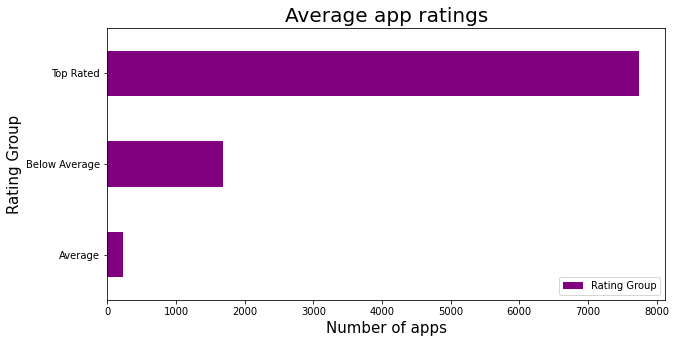

In [77]:
#lets graph "Average Rating" 
pl_data['Rating Group'].value_counts().plot.barh(figsize=(10,5), color = 'purple').invert_yaxis()
plt.ylabel('Rating Group', size=15)
plt.xlabel('Number of apps',size = 15)
plt.title('Average app ratings',size= 20)
plt.legend()

# **Top "Free" App in playstore**

In [78]:
# Creating free_top variable
free_app = pl_data[pl_data['Type'] == 'Free']

In [79]:
#creating top_freeapp 
top_freeapp = free_app[free_app['Installs'] == free_app['Installs'].max()]
top_freeapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Below Average
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top Rated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top Rated
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top Rated
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Top Rated
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,Top Rated
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top Rated
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1.000000e+09,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,Top Rated
1654,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,Top Rated
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,Top Rated


In [ ]:
top_freeapp.shape

(58, 14)

In [ ]:
# top free apps
top_freeapp['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
381                           WhatsApp Messenger
382     Messenger – Text and Video Chat for Free
386                                     Hangouts
391                Skype - free IM & video calls
411                 Google Chrome: Fast & Secure
451                                        Gmail
464                                     Hangouts
468                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
1700                              Subway Surfers
1750                              Subway Surfers
1872                              Subway Surfers
1917                              Subway Surfers
2544                

# **Top 10 App Free category**



In [80]:
# Top 10 apps in catogory wise playstore 
top_freeapp['App']
top_freeapp.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Below Average
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top Rated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top Rated
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top Rated
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Top Rated
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,Top Rated
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top Rated
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1.000000e+09,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,Top Rated
1654,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,Top Rated
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,Top Rated


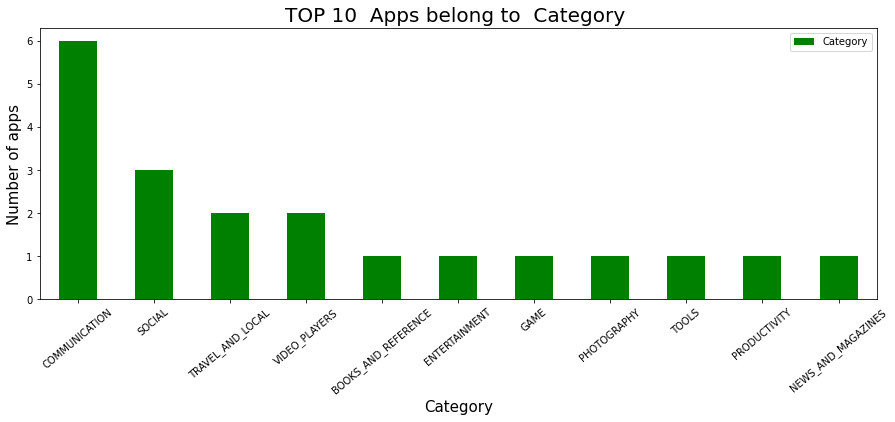

In [81]:
# top 10  free app belong to catgory
top_freeapp['Category'].value_counts().plot.bar(figsize=(15,5),color='green')
plt.xlabel('Category',size=15)
plt.ylabel('Number of apps',size=15)
plt.title( 'TOP 10  Apps belong to  Category ',size=20)
plt.xticks(rotation=40)
plt.legend()

# ** Top "Paid" App in playstore **

# **Top "Paid" 10 Apps in Category**


In [82]:
# Creating paid_ap for paid apps 

paid_ap = pl_data[pl_data['Type'] == 'Paid']
paid_ap.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Top Rated
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Top Rated
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000.0,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Top Rated
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000.0,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Top Rated
477,Calculator,DATING,2.6,57,6.2,1000.0,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Average
478,Truth or Dare Pro,DATING,4.3,0,20.0,50.0,Paid,1.49,Teen,Dating,2017-09-01,1.0,4.0 and up,Top Rated
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.3,0,0.0176,100.0,Paid,2.99,Everyone,Dating,2017-07-25,1.0.1,4.0 and up,Top Rated
480,Ad Blocker for SayHi,DATING,4.3,4,1.2,100.0,Paid,3.99,Teen,Dating,2018-08-02,1.2,4.0.3 and up,Top Rated
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17.0,100.0,Paid,7.99,Mature 17+,Dating,2017-01-21,1.0.1,4.0 and up,Below Average
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63.0,1000.0,Paid,3.99,Everyone,Education;Pretend Play,2017-07-24,1.0,4.0.3 and up,Top Rated


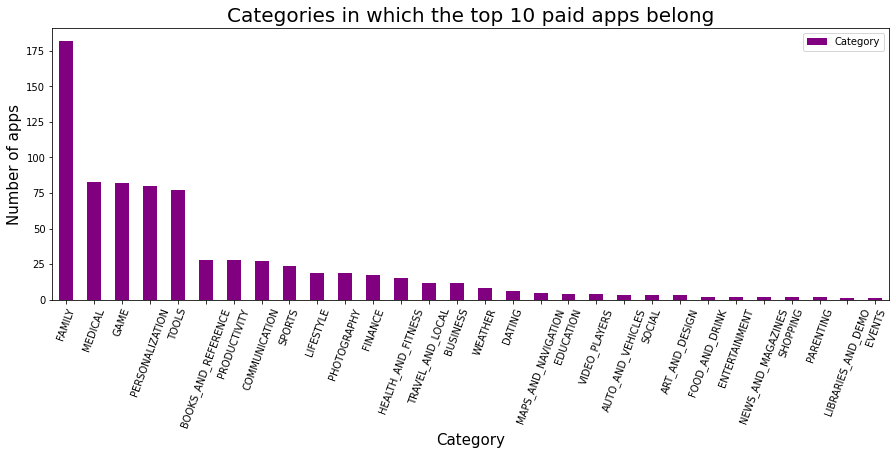

In [83]:
# Categories in which the top 10 paid apps belong to

paid_ap['Category'].value_counts().plot.bar(figsize=(15,5), color='purple')
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps',size=15)
plt.title('Categories in which the top 10 paid apps belong', size= 20)
plt.xticks(rotation=70)
plt.legend()

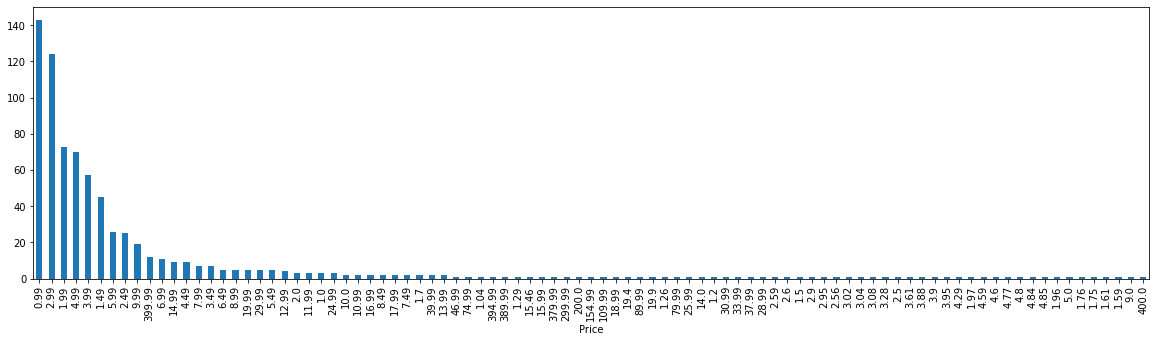

In [84]:
# Apps that are paid at particular Price

paid_ap.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,5))

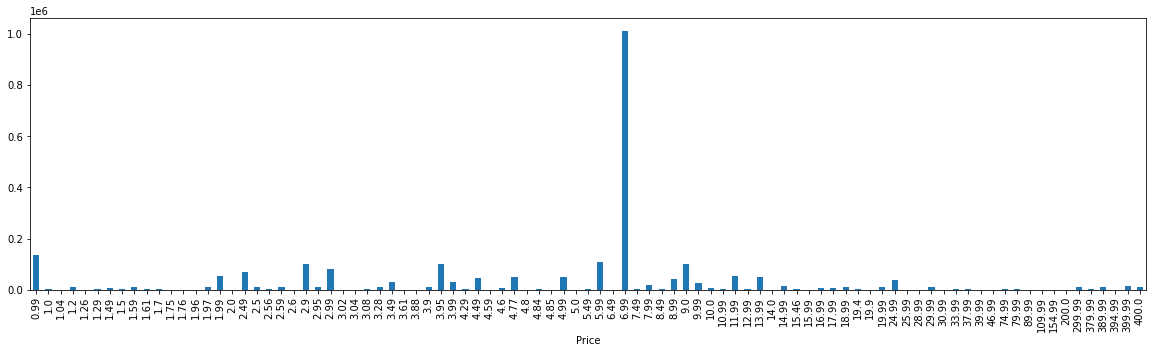

In [85]:
# Price of App that are installed 
paid_ap.groupby('Price')['Installs'].mean().plot.bar(figsize=(20,5))

# **High number of Reviews of Top apps**

Text(0.5, 1.0, 'Top  apps with the highest number of user reviews')

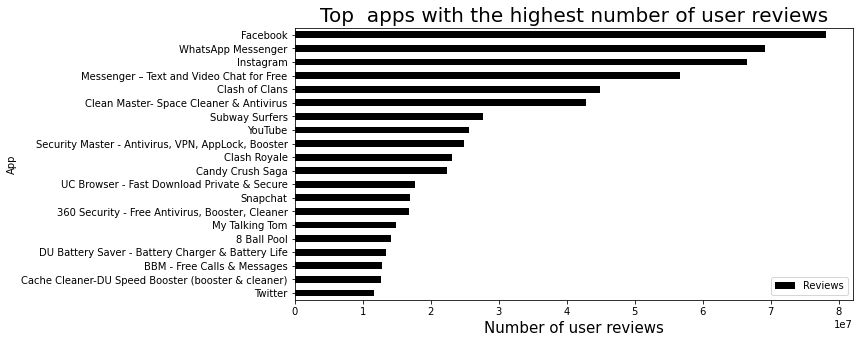

In [86]:
# high number of Reviews of Top Apps

pl_data.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (10,5), color = 'black').invert_yaxis()
plt.xlabel('Number of user reviews',size=15)
plt.title('Top  apps with the highest number of user reviews',size=20)

# **Correlation heat map of all columns in playstore**






In [ ]:
# correlation between different columns in play store 

pl_data.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.050212,0.034306,-0.018674
Reviews,0.050212,1.000000,0.625158,-0.007603
Installs,0.034306,0.625158,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.009412,1.000000


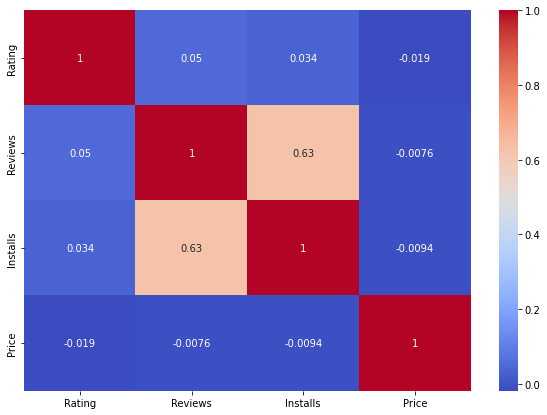

In [ ]:
# Correlation heatmap

plt.figure(figsize = (10,7))
sea.heatmap(pl_data.corr(), annot= True,cmap='coolwarm')


#**Visualize the strength of relationships between columns**
*    CorreRelation between the "Reviews "and "Installs" column strongly positive,Higher the number  of installs, higher is the user base , higher are the total number of reviews dropped by users.  
* The `Price` is slightly negatively correlated with the `Rating`, `Reviews`, and `Installs`. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
* the `Rating` is slightly positively correlated with the `Installs` and `Reviews` column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.




# **Data visualization of User Review**

 **Sentiment Data Across All Reviews**

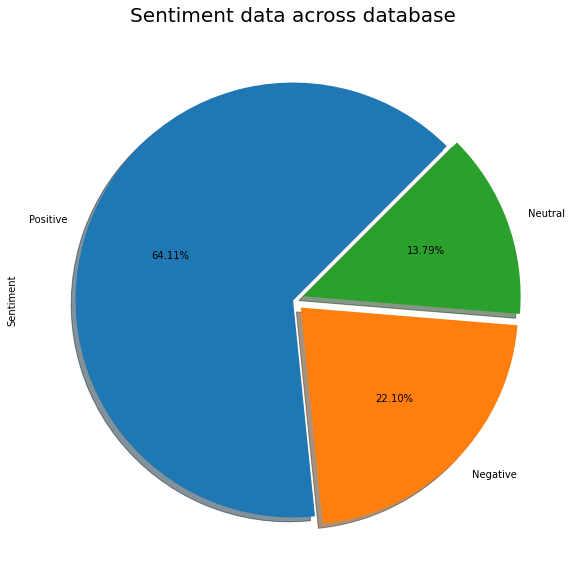

In [ ]:
plt.figure(figsize=(15,10))
pd.value_counts(rev_ur["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 )
plt.title("Sentiment data across database",size=20)
plt.show()


As per "sentimnet data across database **Positve**=**64.11%** ,,
**Neutral**= **13.79%**
                         **Negative**=**22.10%**

In [14]:
#marge both database for more analysis

merge_pl_rev = pl_data.merge(rev_ur, on="App")
merge_pl_rev.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

In [87]:
# select  popular app in category 
popular_app_ctgry = pl_data[pl_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
popular_app_ctgry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5423 entries, 187 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             5423 non-null   object        
 1   Category        5423 non-null   object        
 2   Rating          5423 non-null   float64       
 3   Reviews         5423 non-null   int64         
 4   Size            5423 non-null   object        
 5   Installs        5423 non-null   float64       
 6   Type            5423 non-null   object        
 7   Price           5423 non-null   float64       
 8   Content Rating  5423 non-null   object        
 9   Genres          5423 non-null   object        
 10  Last Updated    5423 non-null   datetime64[ns]
 11  Current Ver     5423 non-null   object        
 12  Android Ver     5423 non-null   object        
 13  Rating Group    5423 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)

**Reviws of inpolular App catogory**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


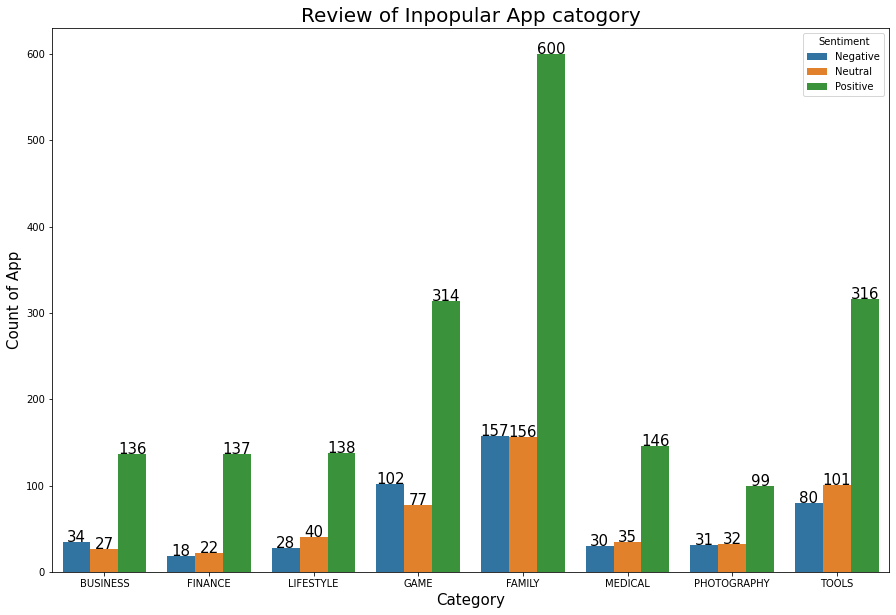

In [92]:
plt.figure(figsize=(15,10))
ax = sea.countplot(popular_app_ctgry['Category'],hue=merge_pl_rev['Sentiment']);
plt.xlabel('Category', size=15)
plt.ylabel('Count of App',size=15)

plt.title("Review of Inpopular App catogory",size=20)


for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 15)
    
plt.show()


# **Top App with positive REviews**



In [ ]:
rev_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [89]:
#  lets check sentiment for each   
rev_ur.groupby('App')['Sentiment'].value_counts()

App                               Sentiment
10 Best Foods for You             Positive     162
                                  Neutral       22
                                  Negative      10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室  Positive      31
                                  Neutral        8
                                              ... 
Hotwire Hotel & Car Rental App    Neutral       11
                                  Negative       6
Housing-Real Estate & Property    Negative      10
                                  Positive       8
                                  Neutral        3
Name: Sentiment, Length: 2376, dtype: int64

In [90]:
# positve review
positive_reviews_pl = rev_ur[rev_ur['Sentiment'] == 'Positive']
positive_reviews_pl

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

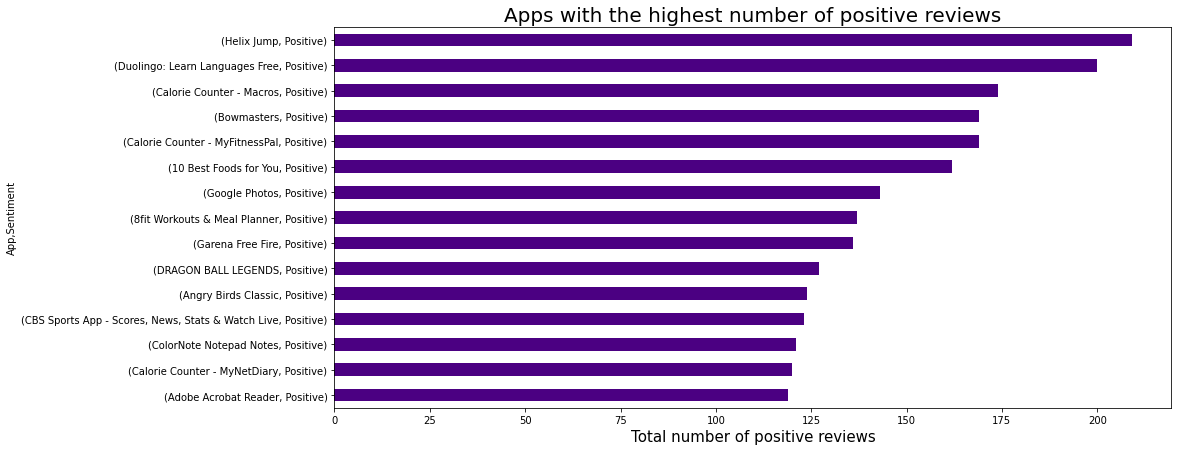

In [101]:
positive_reviews_pl.groupby('App')['Sentiment'].value_counts().nlargest(15).plot.barh(figsize=(15,7), color='indigo').invert_yaxis()
plt.xlabel('Total number of positive reviews', size= 15)

plt.title('Apps with the highest number of positive reviews', size=20)

# **Top App with Negative review**

In [8]:
# negative review
negative_reviews_pl = rev_ur[rev_ur['Sentiment'] == 'Negative']
negative_reviews_pl

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

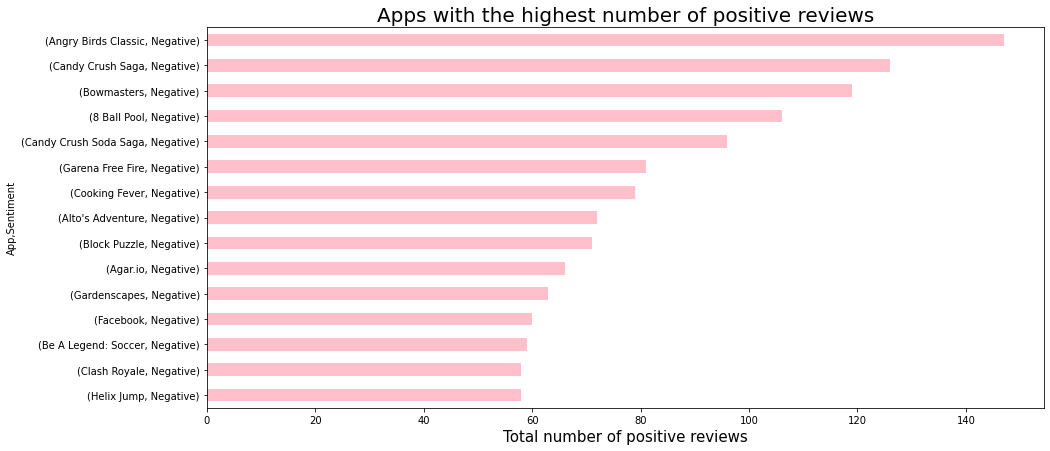

In [9]:
negative_reviews_pl.groupby('App')['Sentiment'].value_counts().nlargest(15).plot.barh(figsize=(15,7), color='pink').invert_yaxis()
plt.xlabel('Total number of positive reviews', size= 15)

plt.title('Apps with the highest number of positive reviews', size=20)


# **App in sentimnet of each Content Rating of age with its postive negative and neutral sentiment**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


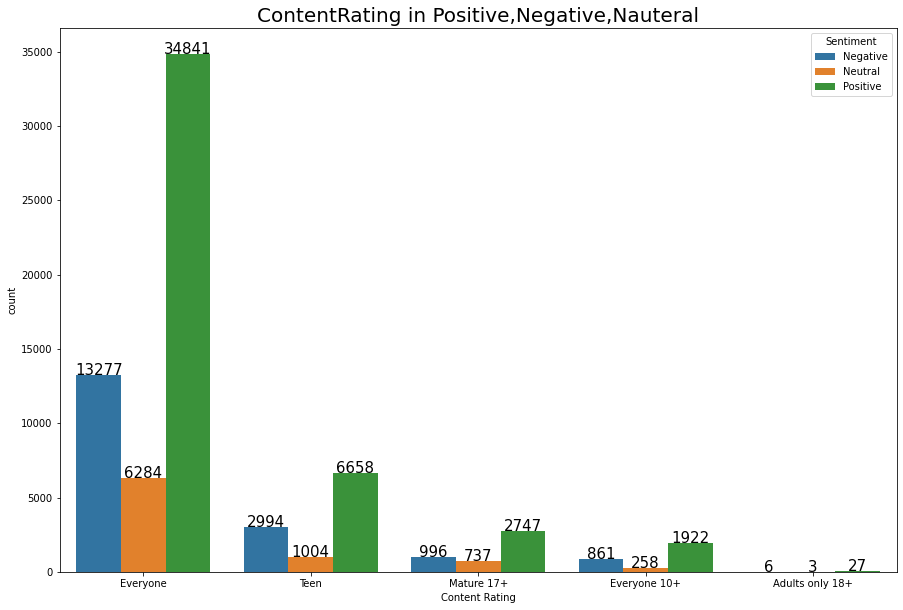

In [111]:
plt.figure(figsize=(15,10))
ax = sea.countplot(merge_pl_rev["Content Rating"],hue=merged_pl_rev['Sentiment']);
plt.title("ContentRating in Positive,Negative,Nauteral",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 15)

plt.show()


# **corelation heat map of relation between diff cooumn of user reviews**

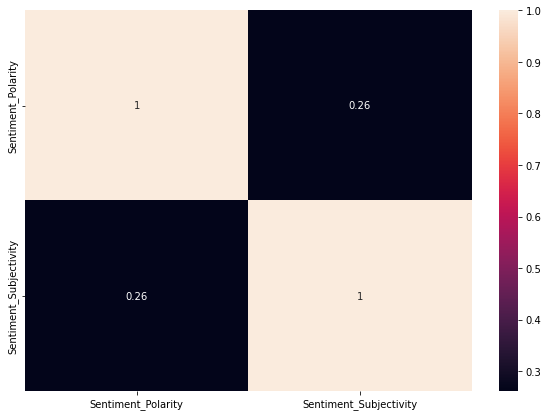

In [12]:
plt.figure(figsize=(10,7))
sea.heatmap(rev_ur.corr(),annot=True,)



# **Summary  of visualization**



*  There are mostly Apps are "Free " which total *92.6%* and and "Paid" are just *7.4%*
* AS per analysis *80.4%* Apps are accessible for All age group  and other as pre Age groups


*   As Rating of App *81.6%* are Top Rated , *8.1%* are average, *16.3%* are below average  
*  Top App in Category present in **Family** ,*2nd*   Top app is under **Games** and *3rd* is in  **Tools**


*   Top FREE App belong to **Communication** , **Social**.
*   Top PAID App belong to **Family  ,,Medical**,, **Games**,, **Personalization**, ans **Tools **

*   **Facebook** is on TOP  one in User Reviews

*  **Whatsapp Messenger** and **Instagram** is second most Top app with User Review 
*   APP with highest number  positive user review are **Helix Jump** ,**Duolingo(Learn Language)**, **Calories counter**


*    APP with highest number Negative user review are **Angry Birds Classic**,, **Candy Crush saga**,, **Bowmaster** 












